In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom

Data consists of six columns.

First three columns are connected with the measurement parameters (in sequence: section = search field ID, ID = measurement ID, section_area = search field area in hectares).
Last three columns are connected with the shafts parameters (in sequence: object_area = area of the form (embankment + shaft) in square meters, rel_height = relative height of the embankment around the shaft in meters, object_dostance = distance between shafs (holes) in meters.

In [16]:
dataset = pd.read_csv("mines_data.csv", encoding='latin1')
dataset

,section,ID,section_area,object_area,rel_height,object_distance
0,1,0,4.76,47600.00,34.4,0.00
1,2,1,4.79,390.91,2.1,26.82
2,2,2,4.79,469.21,3.3,29.59
3,2,3,4.79,49.07,1.7,34.49
4,2,4,4.79,453.73,1.6,26.49
...,...,...,...,...,...,...
145,8,145,1.70,82.60,1.1,12.80
146,8,146,1.70,153.70,0.9,3.50
147,8,147,1.70,112.10,0.6,5.40
148,8,148,1.70,178.40,1.3,0.00


To create SOM, I used all data, referring to the measurements and, additionally, research field area, as it carries information about shafts density and arrangement.

In [17]:
data_som = dataset[['section_area', 'object_area', 'rel_height', 'object_distance']]
data_som

,section_area,object_area,rel_height,object_distance
0,4.76,47600.00,34.4,0.00
1,4.79,390.91,2.1,26.82
2,4.79,469.21,3.3,29.59
3,4.79,49.07,1.7,34.49
4,4.79,453.73,1.6,26.49
...,...,...,...,...
145,1.70,82.60,1.1,12.80
146,1.70,153.70,0.9,3.50
147,1.70,112.10,0.6,5.40
148,1.70,178.40,1.3,0.00


I standardarized the data, to unify units (hectares and meters).

In [18]:
sc = StandardScaler()
data_som_sc = sc.fit_transform(data_som)

Below, I subtracted section ID and measurement ID for further plotting purposes.

In [19]:
ids = dataset[['ID']]
I = ids['ID'].tolist()
section = dataset[['section']]
S = section['section'].tolist()

Finally, I trained simple SOM on not much tuned parameters. Training is just a second.

In [20]:
som = MiniSom(x = 21, y = 21, input_len = 4, neighborhood_function = 'gaussian', sigma = 1.5, learning_rate = 0.5)
som.random_weights_init(data_som_sc)
som.train_random(data = data_som_sc, num_iteration = 1000)

First plot shows distance map between neurons. Markers correspond to the section IDs. SOM clustered shafts rather according to their origin in the terrain, including some exeptions of course. Blank spaces between markers can be interpret as borders between clusters, where bright color means very strong border and darker means border, which is not so defined.

So, red point could be interpret as the outlier in the data, group of dark green squares and blue diamonds are also strongly different from the other data. Other clusters are mixed, so there are similarities between them. I will check this hypothesis later.

<Figure size 432x288 with 0 Axes>

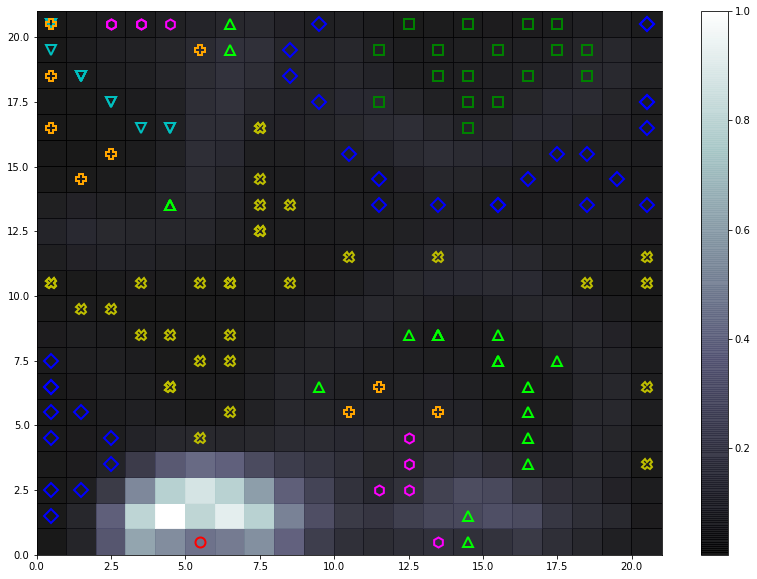

In [21]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
plt.figure(figsize=(14, 10))
pcolor(som.distance_map().T, alpha=.9)
colorbar()
markers = ['*', 'o', 's', 'D', 'X', 'v', 'P', 'h', '^']
colors = ['grey', 'r', 'g', 'b', 'y', 'c', 'orange', 'fuchsia', 'lime']
for i, x in enumerate(data_som_sc):
    w = som.winner(x)
    plot(w[0] + 0.5,
        w[1] + 0.5,
        markers[S[i]],
        markeredgecolor=colors[S[i]],
        markerfacecolor='None',
        markersize = 10,
        markeredgewidth=2
        )
show()

Second plot, with markers corresponding to section ID. I reversed colors of the distance map for beter readability of the plot. Legend shows markers, which are assigned to the section IDs.

<Figure size 432x288 with 0 Axes>

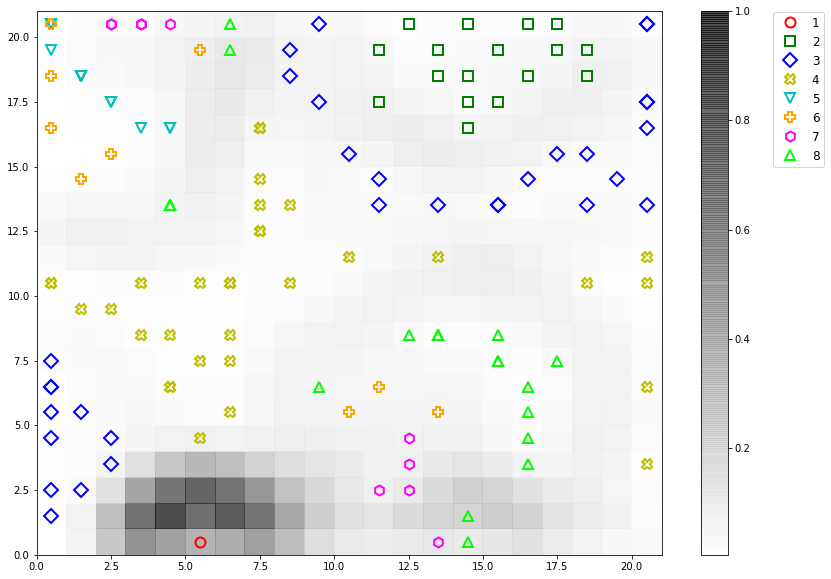

In [22]:
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='r', label='1',
                   markerfacecolor='w', markersize=10, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='s', color='g', label='2',
                   markerfacecolor='w', markersize=10, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='D', color='b', label='3',
                   markerfacecolor='w', markersize=10, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='X', color='y', label='4',
                   markerfacecolor='w', markersize=10, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='v', color='c', label='5',
                   markerfacecolor='w', markersize=10, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='P', color='orange', label='6',
                   markerfacecolor='w', markersize=10, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='h', color='fuchsia', label='7',
                   markerfacecolor='w', markersize=10, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='^', color='lime', label='8',
                   markerfacecolor='w', markersize=10, linestyle='None', markeredgewidth=2)]

from pylab import bone, pcolor, colorbar, plot, show
bone()
plt.figure(figsize=(14, 10))
pcolor(som.distance_map().T, cmap='gray_r', alpha=.7)
colorbar()
markers = ['*', 'o', 's', 'D', 'X', 'v', 'P', 'h', '^']
colors = ['grey', 'r', 'g', 'b', 'y', 'c', 'orange', 'fuchsia', 'lime']
for i, x in enumerate(data_som_sc):
    w = som.winner(x)
    plot(w[0] + 0.5,
        w[1] + 0.5,
        markers[S[i]],
        markeredgecolor=colors[S[i]],
        markerfacecolor='None',
        markersize = 10,
        markeredgewidth=2
        )
plt.legend(handles=legend_elements, bbox_to_anchor=(1.27, 1.01), prop={'size': 12}, ncol=1)
show()

Third plot, the same, as previous, with addition of the following measurement IDs.

<Figure size 432x288 with 0 Axes>

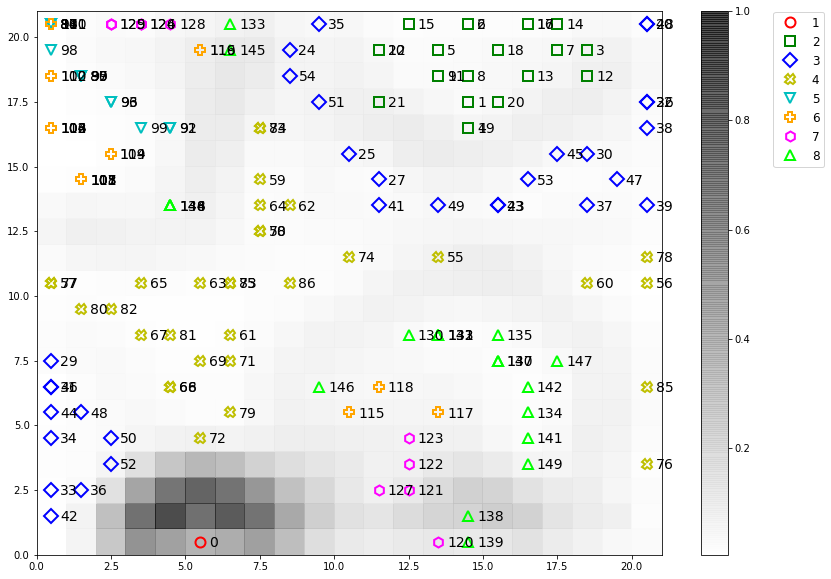

In [23]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
plt.figure(figsize=(14, 10))
pcolor(som.distance_map().T, cmap='gray_r', alpha=.7)
colorbar()
markers = ['*', 'o', 's', 'D', 'X', 'v', 'P', 'h', '^']
colors = ['grey', 'r', 'g', 'b', 'y', 'c', 'orange', 'fuchsia', 'lime']
for i, x in enumerate(data_som_sc):
    w = som.winner(x)
    plot(w[0] + 0.5,
        w[1] + 0.5,
        markers[S[i]],
        markeredgecolor=colors[S[i]],
        markerfacecolor='None',
        markersize = 10,
        markeredgewidth=2
        )
wmap = {}
im = 0
for x, t in zip(data_som_sc, I):
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.8,  w[1]+.3,  str(t),
              color='k', fontdict={'weight': 'normal', 'size': 14})
    im = im + 1
plt.legend(handles=legend_elements, bbox_to_anchor=(1.27, 1.01), prop={'size': 12}, ncol=1)
show()

Let's test out hypothesis.

1. Outlier red circle, which is measurement ID 0 from research field 1, has obviously different parameters from the other measurements.

In [24]:
ro1 = dataset[dataset['ID'] == 0]
ro1

,section,ID,section_area,object_area,rel_height,object_distance
0,1,0,4.76,47600.0,34.4,0.0


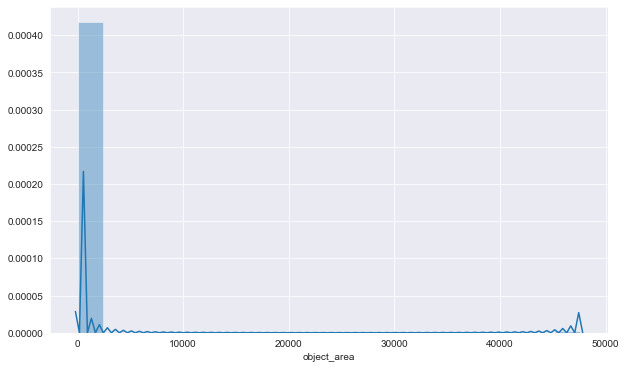

In [25]:
x = dataset.object_area
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.distplot(x, label="item_id", kde=True, bins=20)

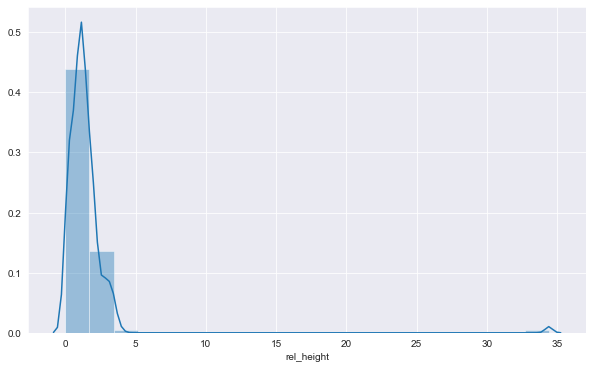

In [26]:
x = dataset.rel_height
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.distplot(x, label="item_id", kde=True, bins=20)

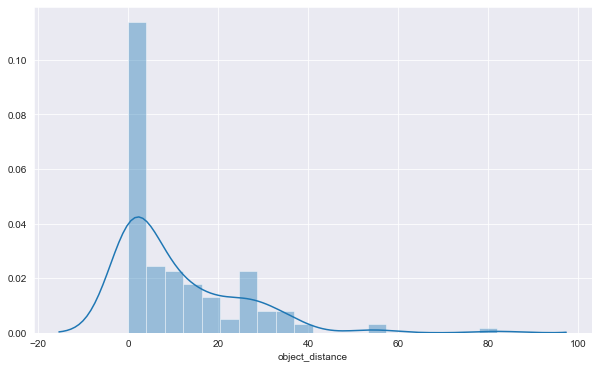

In [27]:
x = dataset.object_distance
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.distplot(x, label="item_id", kde=True, bins=20)

2. Dark green squares, which are measurements from research field 2, are the second group of the very high objects, right behind outlier object. All the parameters in this cluster have small variance, so only height determines their different character.

In [28]:
dgs2 = dataset[dataset['section'] == 2]
dgs2

,section,ID,section_area,object_area,rel_height,object_distance
1,2,1,4.79,390.91,2.1,26.82
2,2,2,4.79,469.21,3.3,29.59
3,2,3,4.79,49.07,1.7,34.49
4,2,4,4.79,453.73,1.6,26.49
5,2,5,4.79,372.74,3.0,27.89
6,2,6,4.79,509.98,3.2,30.67
7,2,7,4.79,557.20,2.2,33.63
8,2,8,4.79,501.65,2.8,28.07
9,2,9,4.79,480.70,2.9,27.05
10,2,10,4.79,414.95,3.4,23.13


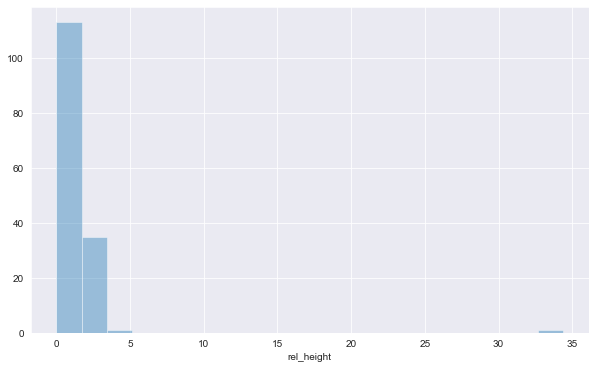

In [29]:
x = dataset.rel_height
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.distplot(x, label="x", kde=False, bins=20)

3. Blue diamonds is the cluster, which is also readable, but it is more scattered, than previous ones. The objects inside the cluster have similar area and they are also rather high. That, what differs them, is variance in the object arrangement in the terrain. This group is arranged more irregular.

In [30]:
bd3 = dataset[dataset['section'] == 3]
bd3

,section,ID,section_area,object_area,rel_height,object_distance
23,3,23,3.56,314.60,1.7,15.50
24,3,24,3.56,368.71,1.9,21.24
25,3,25,3.56,385.13,1.6,11.13
26,3,26,3.56,317.12,1.5,24.97
27,3,27,3.56,293.49,1.7,8.22
28,3,28,3.56,321.01,1.9,36.14
29,3,29,3.56,278.86,0.9,0.50
30,3,30,3.56,331.23,1.3,18.23
31,3,31,3.56,345.44,1.2,0.00
32,3,32,3.56,350.51,1.4,25.31


The data is dual - there are objects very close to each other and objects far away from each other.

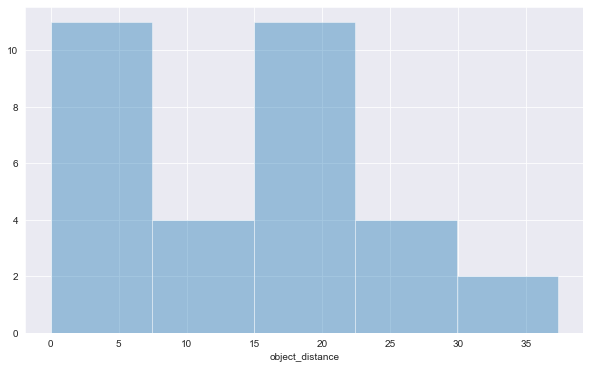

In [32]:
x = bd3.object_distance
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.distplot(x, label="x", kde=False, bins=5)

And that is the reason for the scattered character of the cluster. The right part of the cluster contains objects with the long distance between them, with the longest values in the upper right part.

In [33]:
bd3_upper_right = bd3[bd3['object_distance'] > 30]
bd3_upper_right

,section,ID,section_area,object_area,rel_height,object_distance
28,3,28,3.56,321.01,1.9,36.14
40,3,40,3.56,137.66,1.5,37.34


In [34]:
bd3_right = bd3[bd3['object_distance'] > 20]
bd3_right

,section,ID,section_area,object_area,rel_height,object_distance
24,3,24,3.56,368.71,1.9,21.24
26,3,26,3.56,317.12,1.5,24.97
28,3,28,3.56,321.01,1.9,36.14
32,3,32,3.56,350.51,1.4,25.31
35,3,35,3.56,236.58,2.3,24.61
38,3,38,3.56,271.16,1.0,24.75
40,3,40,3.56,137.66,1.5,37.34


Lowest part of the cluster contains objets with middle distance between them.

In [35]:
bd3_lower = bd3[bd3['object_distance'] > 15]
bd3_lower

,section,ID,section_area,object_area,rel_height,object_distance
23,3,23,3.56,314.60,1.7,15.50
24,3,24,3.56,368.71,1.9,21.24
26,3,26,3.56,317.12,1.5,24.97
28,3,28,3.56,321.01,1.9,36.14
30,3,30,3.56,331.23,1.3,18.23
32,3,32,3.56,350.51,1.4,25.31
35,3,35,3.56,236.58,2.3,24.61
37,3,37,3.56,304.94,1.2,16.17
38,3,38,3.56,271.16,1.0,24.75
39,3,39,3.56,165.74,0.3,15.94


And the left part of the cluster contains objects with short distance between them.

In [36]:
bd3_left = bd3[bd3['object_distance'] < 10]
bd3_left

,section,ID,section_area,object_area,rel_height,object_distance
27,3,27,3.56,293.49,1.7,8.22
29,3,29,3.56,278.86,0.9,0.50
31,3,31,3.56,345.44,1.2,0.00
33,3,33,3.56,246.31,1.6,4.57
34,3,34,3.56,249.53,1.3,2.61
36,3,36,3.56,354.47,1.9,4.31
41,3,41,3.56,324.79,1.2,8.36
42,3,42,3.56,270.57,1.4,5.95
44,3,44,3.56,198.01,1.3,0.50
46,3,46,3.56,295.63,1.2,0.50


4. Yellow X marked as research field 4 on the distance maps, are divided into 3 clusters.

In [37]:
yx4 = dataset[dataset['section'] == 4]
yx4

,section,ID,section_area,object_area,rel_height,object_distance
55,4,55,2.91,106.93,0.9,8.07
56,4,56,2.91,348.24,1.1,14.03
57,4,57,2.91,662.24,0.9,0.00
58,4,58,2.91,593.50,1.5,6.81
59,4,59,2.91,314.04,2.1,8.81
60,4,60,2.91,255.06,0.8,12.63
61,4,61,2.91,726.23,1.2,2.50
62,4,62,2.91,493.85,1.6,9.51
63,4,63,2.91,530.25,1.0,3.60
64,4,64,2.91,618.95,2.0,7.83


Outlier part within section 4 is the cluster with objects located far away from each other. It is the right part of the section 4 on the distance map.

In [38]:
yx4_right = yx4[yx4['object_distance'] > 10]
yx4_right

,section,ID,section_area,object_area,rel_height,object_distance
56,4,56,2.91,348.24,1.1,14.03
60,4,60,2.91,255.06,0.8,12.63
73,4,73,2.91,378.83,2.0,10.66
76,4,76,2.91,418.84,1.5,15.16
78,4,78,2.91,603.79,1.0,14.75
84,4,84,2.91,636.41,1.9,10.96
85,4,85,2.91,409.21,1.3,12.08


Cluster, which is lower part of the section 4, contains objects with medium distance between them.

In [40]:
yx4_lower = yx4[yx4['object_distance'] > 5]
yx4_lower

,section,ID,section_area,object_area,rel_height,object_distance
55,4,55,2.91,106.93,0.9,8.07
56,4,56,2.91,348.24,1.1,14.03
58,4,58,2.91,593.50,1.5,6.81
59,4,59,2.91,314.04,2.1,8.81
60,4,60,2.91,255.06,0.8,12.63
62,4,62,2.91,493.85,1.6,9.51
64,4,64,2.91,618.95,2.0,7.83
70,4,70,2.91,755.45,1.5,6.55
73,4,73,2.91,378.83,2.0,10.66
74,4,74,2.91,137.80,1.2,8.15


Cluster, which is upper part of the section 4, consists of objects, distributed very closely in the terrain.

In [41]:
yx4_upper = yx4[yx4['object_distance'] < 10]
yx4_upper

,section,ID,section_area,object_area,rel_height,object_distance
55,4,55,2.91,106.93,0.9,8.07
57,4,57,2.91,662.24,0.9,0.00
58,4,58,2.91,593.50,1.5,6.81
59,4,59,2.91,314.04,2.1,8.81
61,4,61,2.91,726.23,1.2,2.50
62,4,62,2.91,493.85,1.6,9.51
63,4,63,2.91,530.25,1.0,3.60
64,4,64,2.91,618.95,2.0,7.83
65,4,65,2.91,616.64,1.0,1.84
66,4,66,2.91,247.76,1.6,2.39


5. Cyan triangle and orange cross sections are mixed and assigned by our SOM into one cluster. Those objects have similar parameters, with smaller objects located in the left part of the cluster and bigger in the right part of the cluster.

In [42]:
ct5 = dataset[dataset['section'] == 5]
ct5

,section,ID,section_area,object_area,rel_height,object_distance
87,5,87,1.08,169.52,0.3,0.0
88,5,88,1.08,291.88,0.2,0.0
89,5,89,1.08,233.15,0.6,0.0
90,5,90,1.08,276.52,0.5,0.0
91,5,91,1.08,330.67,1.5,0.0
92,5,92,1.08,201.68,1.6,0.0
93,5,93,1.08,174.49,0.8,0.0
94,5,94,1.08,160.00,0.1,0.0
95,5,95,1.08,148.37,0.5,0.0
96,5,96,1.08,127.48,0.9,0.0


In [43]:
oc6 = dataset[dataset['section'] == 6]
oc6

,section,ID,section_area,object_area,rel_height,object_distance
100,6,100,1.19,102.8,0.5,0.0
101,6,101,1.19,126.6,0.0,0.0
102,6,102,1.19,99.5,0.7,0.0
103,6,103,1.19,165.4,1.0,0.0
104,6,104,1.19,85.8,0.8,0.0
105,6,105,1.19,86.7,1.0,0.0
106,6,106,1.19,66.0,0.8,0.0
107,6,107,1.19,66.3,1.0,0.0
108,6,108,1.19,65.8,1.0,0.0
109,6,109,1.19,68.9,1.1,0.0


6. Fuchsia hexagon cluster, marked as research field 7, is one cluster with only one object, assigned by a SOM as a strong outlier. Measurement of the ID 120 is far away from other shafts and that was the determinant of the outlying.

In [44]:
fh7 = dataset[dataset['section'] == 7]
fh7

,section,ID,section_area,object_area,rel_height,object_distance
120,7,120,0.37,108.8,0.4,55.0
121,7,121,0.37,141.2,1.1,23.4
122,7,122,0.37,226.8,0.7,14.7
123,7,123,0.37,256.4,0.4,9.8
124,7,124,0.37,144.9,0.2,2.2
125,7,125,0.37,125.4,0.1,0.0
126,7,126,0.37,100.7,0.3,0.0
127,7,127,0.37,162.6,0.1,19.7
128,7,128,0.37,142.8,2.0,0.0
129,7,129,0.37,255.9,0.2,0.0


7. Lastly, bright green triangles, marked as research field 8, are assigned as one cluster with some outliers, near outlier from fuchsia hexagon point. And, indeed, those measurements with IDs 138 and 139, have long object distance, which makes them look similar to the measurement with ID 120 and in the same time, they are outliers within the group, where object distance is very low. Objects with small distance between each other, but larger than the rest of the cluster (except for the outliers), are located in the upper part of the bright green triangle cluster.

In [45]:
bgt8 = dataset[dataset['section'] == 8]
bgt8

,section,ID,section_area,object_area,rel_height,object_distance
130,8,130,1.7,119.4,0.4,0.0
131,8,131,1.7,135.5,0.3,0.0
132,8,132,1.7,46.0,0.1,0.0
133,8,133,1.7,234.0,1.6,10.2
134,8,134,1.7,119.1,0.1,6.7
135,8,135,1.7,110.2,0.1,3.4
136,8,136,1.7,68.9,1.1,0.0
137,8,137,1.7,62.5,0.3,3.9
138,8,138,1.7,79.2,0.4,54.0
139,8,139,1.7,67.0,0.4,82.0
